# Step 1: Import Libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import joblib  
from sklearn.ensemble import IsolationForest

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset

In [10]:
data = pd.read_csv(r"creditcard.csv")

In [11]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Step 3: Explore the Datsaset

In [12]:
print(data.shape) # shape of the dataset

(284807, 31)


In [13]:
#let's take a look of dataset
print(data.head)

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [14]:
#following are the datatypes involved in the dataset
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [15]:
#checking for null values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Step 4:Data Preprocessing

In [16]:
#Target Variable Check 
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
#feature Scaling 
scaler = StandardScaler()

data['norm_Time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))
data['norm_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

print("New Time after scaling\n", data['norm_Time'])
print("\nNew Amount after scaling\n", data['norm_Amount'])

New Time after scaling
 0        -1.996583
1        -1.996583
2        -1.996562
3        -1.996562
4        -1.996541
            ...   
284802    1.641931
284803    1.641952
284804    1.641974
284805    1.641974
284806    1.642058
Name: norm_Time, Length: 284807, dtype: float64

New Amount after scaling
 0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: norm_Amount, Length: 284807, dtype: float64


In [18]:
#Drop old columns of time and Amount 
data = data.drop(['Time', 'Amount'], axis=1)

# Step 5: Exploratory Data Analysis (EDA)

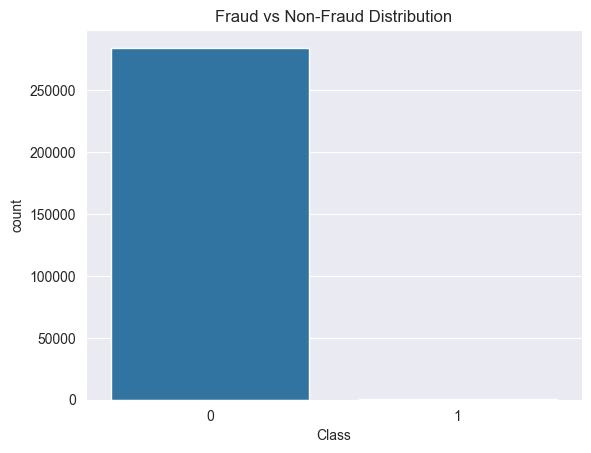

In [19]:
#Target Variable Distribution
sns.countplot(x='Class', data = data) # Fraud = 0 & Non-Fraud =1 
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

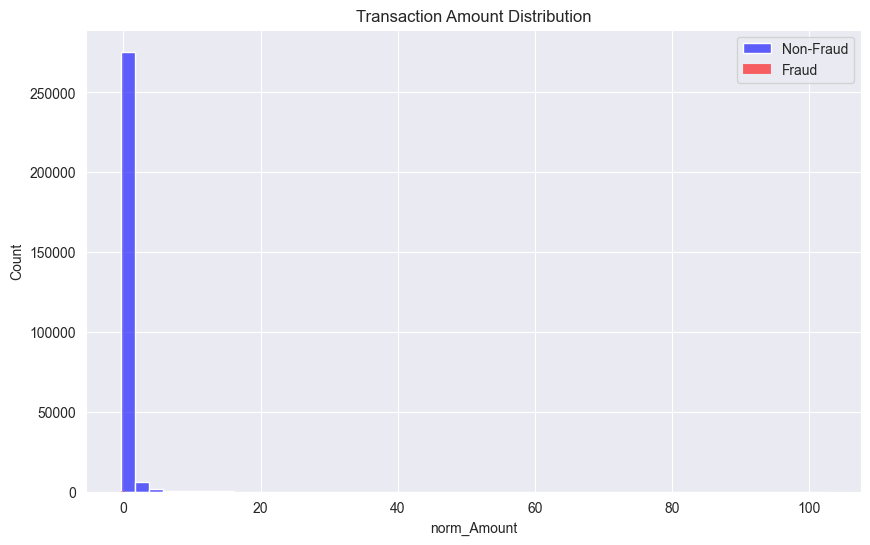

In [20]:
#Amount Analysis 
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class']==0]['norm_Amount'], bins=50, color='blue', label='Non-Fraud', alpha=0.6)
sns.histplot(data[data['Class']==1]['norm_Amount'], bins=50, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

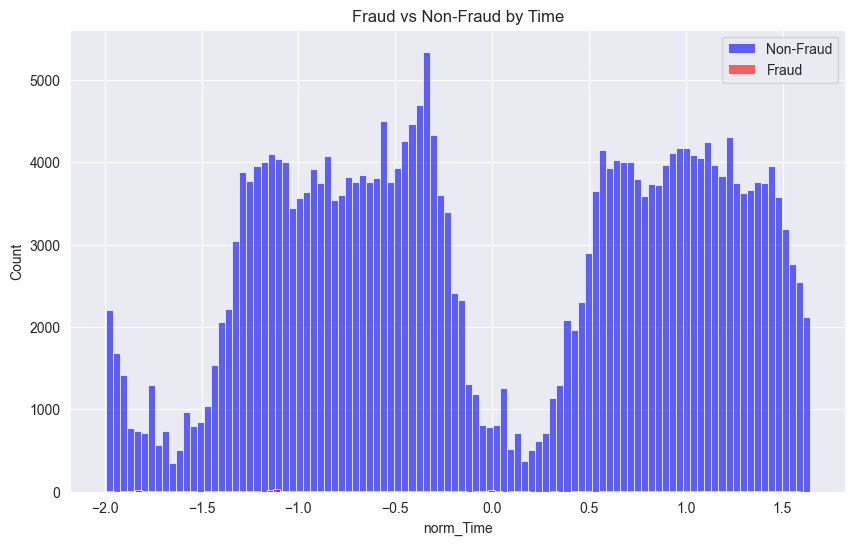

In [21]:
#Time Pattern
plt.figure(figsize=(10,6))
sns.histplot(data[data['Class']==0]['norm_Time'], bins=100, color='blue', label='Non-Fraud', alpha=0.6)
sns.histplot(data[data['Class']==1]['norm_Time'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title("Fraud vs Non-Fraud by Time")
plt.show()


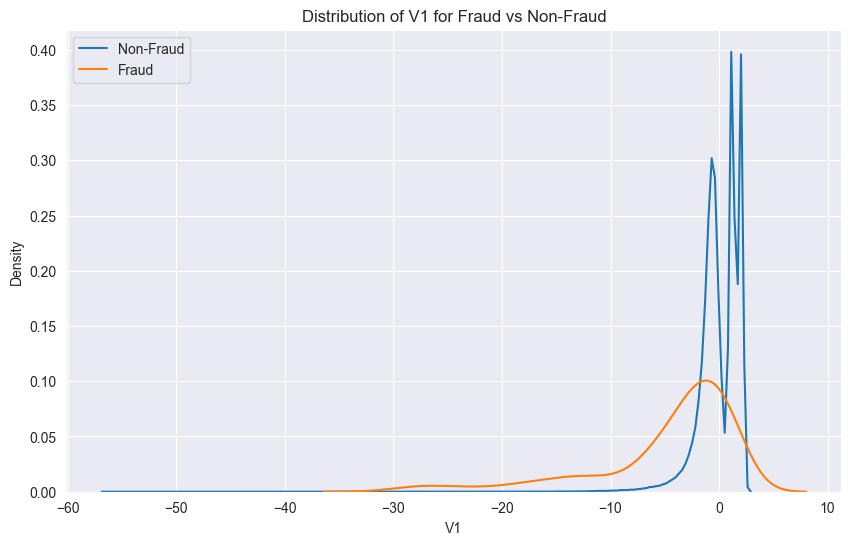

In [22]:
#Feature Distibution
plt.figure(figsize=(10,6))
sns.kdeplot(data[data['Class']==0]['V1'], label="Non-Fraud")
sns.kdeplot(data[data['Class']==1]['V1'], label="Fraud")
plt.title("Distribution of V1 for Fraud vs Non-Fraud")
plt.legend()
plt.show()

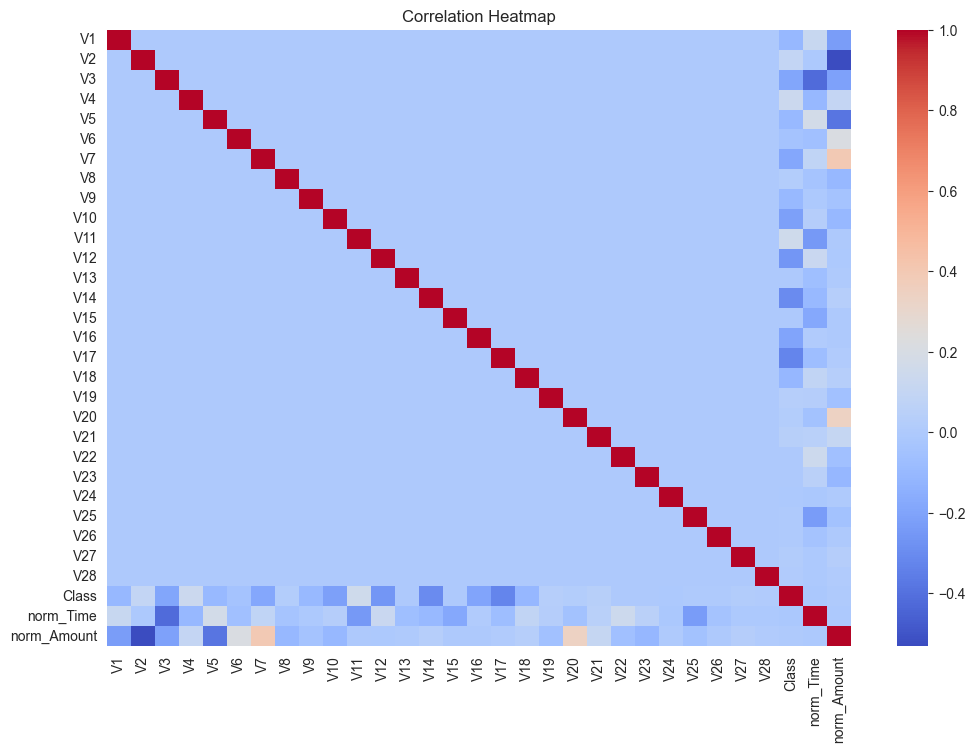

In [23]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
#Fraud Case Insights
fraud = data[data['Class']==1]
nonfraud = data[data['Class']==0]

print("Fraud mean values:\n", fraud.mean())
print("\nNon-Fraud mean values:\n", nonfraud.mean())

Fraud mean values:
 V1            -4.771948
V2             3.623778
V3            -7.033281
V4             4.542029
V5            -3.151225
V6            -1.397737
V7            -5.568731
V8             0.570636
V9            -2.581123
V10           -5.676883
V11            3.800173
V12           -6.259393
V13           -0.109334
V14           -6.971723
V15           -0.092929
V16           -4.139946
V17           -6.665836
V18           -2.246308
V19            0.680659
V20            0.372319
V21            0.713588
V22            0.014049
V23           -0.040308
V24           -0.105130
V25            0.041449
V26            0.051648
V27            0.170575
V28            0.075667
Class          1.000000
norm_Time     -0.296223
norm_Amount    0.135382
dtype: float64

Non-Fraud mean values:
 V1             0.008258
V2            -0.006271
V3             0.012171
V4            -0.007860
V5             0.005453
V6             0.002419
V7             0.009637
V8            -0.000987
V9  

# Step 6: Splitting Dataset for training models

In [25]:
#Splitting Dataset 
X = data.drop('Class', axis=1)
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Step 7: Training of Unsupervised Learning 

#### A) Anomaly Detection – Isolation Forest

In [26]:
# Train Isolation Forest
iso = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
Y_pred_iso = iso.fit_predict(X_train)

# Convert predictions (-1 = anomaly, 1 = normal) to (1 = fraud, 0 = normal)
Y_pred_iso = [1 if x == -1 else 0 for x in Y_pred_iso]

# Evaluate on test set
Y_test_pred = iso.predict(X_test)
Y_test_pred = [1 if x == -1 else 0 for x in Y_test_pred]

#### B) Anomaly Detection – AutoEncoder

In [27]:
# Build AutoEncoder
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(16, activation="relu")(input_layer)
encoder = Dense(8, activation="relu")(encoder)
decoder = Dense(16, activation="relu")(encoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Train AutoEncoder on normal transactions only (class=0)
X_train_normal = X_train[Y_train == 0]
autoencoder.fit(X_train_normal, X_train_normal,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_split=0.2)

# Get reconstruction errors
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Set threshold
threshold = np.percentile(mse, 95)

# Predict
Y_pred_auto = [1 if e > threshold else 0 for e in mse]

Epoch 1/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.5462 - val_loss: 0.3997
Epoch 2/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3599 - val_loss: 0.3324
Epoch 3/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.3240 - val_loss: 0.3170
Epoch 4/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3127 - val_loss: 0.3104
Epoch 5/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3084 - val_loss: 0.3065
Epoch 6/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3046 - val_loss: 0.3031
Epoch 7/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.3010 - val_loss: 0.2995
Epoch 8/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2987 - val_loss: 0.2962
Epoch 9/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.2962 - val_loss: 0.2971
Epoch 10/10
2844/2844 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.2930 - val_loss: 0.2897
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


# Step 8: Training Supervised Learning Models

#### A) Training Logistic Regression Model

In [34]:
# Training the baseline model Logistic Regression

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)
Y_prob = log_reg.predict_proba(X_test)[:,1]

#### B) Training Random Forest Model

In [28]:
#Tree based models 
# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
Y_prob_rf = rf.predict_proba(X_test)[:,1]

print("ROC-AUC Score:", roc_auc_score(Y_test, Y_prob_rf))

ROC-AUC Score: 0.947833463013793


#### C) Training XGBOOST Model

In [29]:
#xgboost 
xgb = XGBClassifier(scale_pos_weight=(len(Y_train)-sum(Y_train))/sum(Y_train),
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("ROC-AUC Score:", roc_auc_score(Y_test, y_prob_xgb))

C:\Users\hp\PycharmProjects\FraudDetection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:32:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC-AUC Score: 0.9652206338359767


# Step 9: Handle Class Imbalance

#### A) Random Undersampling

In [30]:
rus = RandomUnderSampler(random_state=42)
X_undersampled, Y_undersampled = rus.fit_resample(X_train, Y_train)

print("Before undersampling:", Y_train.value_counts())
print("After undersampling:", Y_undersampled.value_counts())

# Train XGBoost on undersampled data
xgb_under = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_under.fit(X_undersampled, Y_undersampled)

# Predictions on test set
y_pred_xgb_under = xgb_under.predict(X_test)
y_prob_xgb_under = xgb_under.predict_proba(X_test)[:,1]

Before undersampling: Class
0    227451
1       394
Name: count, dtype: int64
After undersampling: Class
0    394
1    394
Name: count, dtype: int64


C:\Users\hp\PycharmProjects\FraudDetection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:32:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### B) SMOTE (Synthetic Minority Oversampling) 

In [31]:
smote = SMOTE(random_state=42)
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)

print("Before SMOTE:", Y_train.value_counts())
print("After SMOTE:", Y_smote.value_counts())

# Train XGBoost on SMOTE data
xgb_smote = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_smote.fit(X_smote,Y_smote)

# Predictions
y_pred_xgb_smote = xgb_smote.predict(X_test)
y_prob_xgb_smote = xgb_smote.predict_proba(X_test)[:,1]

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


C:\Users\hp\PycharmProjects\FraudDetection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:33:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### C) Class Weights (No resampling)

In [32]:
scale_pos_weight = int((Y_train == 0).sum() / (Y_train == 1).sum())

xgb_weighted = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_weighted.fit(X_train, Y_train)
Y_pred_xgb_weighted = xgb_weighted.predict(X_test)
y_prob_xgb_weighted = xgb_weighted.predict_proba(X_test)[:,1]

C:\Users\hp\PycharmProjects\FraudDetection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Step 10: Model Evaluation and Comparison

In [35]:
# Function to calculate metrics
def get_scores(y_true, y_pred, y_prob=None, model_name="Model"):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (Fraud)": precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        "Recall (Fraud)": recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        "F1-Score (Fraud)": f1_score(y_true, y_pred, pos_label=1, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_prob if y_prob is not None else y_pred),
        "Avg Precision": average_precision_score(y_true, y_prob if y_prob is not None else y_pred)
    }

# Collect all results
results = []

# --- Supervised Models ---
results.append(get_scores(Y_test, Y_pred, Y_prob, "Logistic Regression"))
results.append(get_scores(Y_test, Y_pred_rf, Y_prob_rf, "Random Forest"))
results.append(get_scores(Y_test, y_pred_xgb, y_prob_xgb, "XGBoost (Normal)"))

# --- Class Imbalance Techniques with XGBoost ---
results.append(get_scores(Y_test, y_pred_xgb_under, y_prob_xgb_under, "XGBoost + Undersampling"))
results.append(get_scores(Y_test, y_pred_xgb_smote, y_prob_xgb_smote, "XGBoost + SMOTE"))
results.append(get_scores(Y_test, Y_pred_xgb_weighted, y_prob_xgb_weighted, "XGBoost + Class Weights"))

# --- Anomaly Detection ---
results.append(get_scores(Y_test, Y_test_pred, None, "Isolation Forest"))  # no probability
results.append(get_scores(Y_test, Y_pred_auto, None, "AutoEncoder"))        # no probability

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Sort by ROC-AUC or Avg Precision
df_results = df_results.sort_values(by="Avg Precision", ascending=False)
print("\nSorted Results:\n", df_results)


Sorted Results:
                      Model  Accuracy  Precision (Fraud)  Recall (Fraud)  \
2         XGBoost (Normal)  0.999544           0.882979        0.846939   
1            Random Forest  0.999491           0.960000        0.734694   
5  XGBoost + Class Weights  0.998297           0.502994        0.857143   
4          XGBoost + SMOTE  0.994944           0.239011        0.887755   
0      Logistic Regression  0.975475           0.060852        0.918367   
3  XGBoost + Undersampling  0.956287           0.034630        0.908163   
6         Isolation Forest  0.997964           0.363636        0.244898   
7              AutoEncoder  0.951389           0.031239        0.908163   

   F1-Score (Fraud)   ROC-AUC  Avg Precision  
2          0.864583  0.965221       0.875259  
1          0.832370  0.947833       0.843454  
5          0.633962  0.975975       0.839935  
4          0.376623  0.978054       0.839700  
0          0.114141  0.972167       0.718946  
3          0.066717  0.9

##### From the evaluation of all models and techniques:

##### XGBoost (Normal) achieved the best balance between Precision (0.88) and Recall (0.85) for fraud cases, resulting in the highest F1-score (0.86) and Average Precision (0.875).

##### Random Forest also performed well in terms of precision but had slightly lower F1-score.

##### XGBoost variants with SMOTE or Undersampling increased recall but suffered from very low precision, leading to a high number of false positives.

##### Class Weights improved recall while maintaining moderate precision, but the F1-score was still lower than the normal XGBoost.

##### Isolation Forest and AutoEncoder (unsupervised anomaly detection) performed poorly compared to supervised methods, especially in precision and F1-score.

##### Conclusion: The final model chosen for deployment is XGBoost (Normal) due to its strong balance of precision and recall, high F1-score, and overall robust performance on the fraud detection task.

In [36]:
# save the final model 
joblib.dump(xgb, "xgboost_fraud_model.pkl")

# Load later
model = joblib.load("xgboost_fraud_model.pkl")

# Step 11: Final Pipeline and save

In [42]:
numeric_features = X_train.columns 

# Build pipeline
final_pipeline = Pipeline([
    ("scaler", StandardScaler()),   # scaling step
    ("model", xgb)            # best model
])

# Fit pipeline on training data
final_pipeline.fit(X_train, Y_train)

# Save pipeline (preprocessing + model)
joblib.dump(final_pipeline, "fraud_detection_pipeline.pkl")

print("Final pipeline saved as fraud_detection_pipeline.pkl")

C:\Users\hp\PycharmProjects\FraudDetection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final pipeline saved as fraud_detection_pipeline.pkl


In [38]:
# Load pipeline
loaded_pipeline = joblib.load("fraud_detection_pipeline.pkl")

sample = X_test.iloc[0:1]
# Predict
prob = loaded_pipeline.predict_proba(sample)[:, 1]  # probability of fraud
print("Fraud Probability:", prob)

label = loaded_pipeline.predict(sample)
print("Prediction (0=Normal, 1=Fraud):", label)

Fraud Probability: [1.190798e-07]
Prediction (0=Normal, 1=Fraud): [0]
